<p style="text-align: center;">

# Power and effect size
### Lex Kravitz

</p>


In [1]:
#import our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

### Goals of lecture:
- Introduce one more package: Pingouin
- Understand statistical power 
- Learn what an "effect size" is, and how to express it
- Determine how to calculate the number of subjects you should include in your studies

### What is a Pingouin?
![](https://i.pinimg.com/originals/64/77/de/6477de09007adca909c6e73e94f59b07.gif)

###  [Pingouin](https://pingouin-stats.org/) is also a stats package!



Let's install Pingouin (you'll need this for the homework)!

In [2]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


### Useful Pingouin functions:
[T-test](https://pingouin-stats.org/build/html/generated/pingouin.ttest.html) <br>
[ANOVA](https://pingouin-stats.org/build/html/generated/pingouin.anova.html#pingouin.anova) <br>
[Linear regression](https://pingouin-stats.org/build/html/generated/pingouin.linear_regression.html#pingouin.linear_regression) <br>
[Power analysis - t-test](https://pingouin-stats.org/build/html/generated/pingouin.power_ttest.html#pingouin.power_ttest) <br>

### Goals of lecture:
- ~~Introduce one more package: Pingouin~~
- Understand statistical power 
- Learn what an "effect size" is, and how to express it
- Determine how to calculate the number of subjects you should include in your studies

# What is power?
<img src="https://sm.ign.com/ign_fr/news/a/avengers-e/avengers-endgame-marvel-toys-may-reveal-thanos-new-weapon_2yx5.jpg" alt="Drawing" style="width: 700px;"/>

# What is statistical power?


### Statistical Power: The probability of detecting a significant result in your sample when it exists in the population (i.e a true positive).

## What do the terms "sample" and "population" mean?

![](https://statsandr.com/blog/what-is-the-difference-between-population-and-sample_files/population-sample.png)
<br>
https://statsandr.com/blog/what-is-the-difference-between-population-and-sample/


### What level of Statistical Power should you aim for?
- You will almost always use a power of 0.80, just as you will almost always use an alpha of 0.05 


- Like the convention of using 0.05 as your alpha, the reason for using 0.80 for power is a bit arbitrary. 


- The reason for a desired Power of 0.80 is attributed to Jacob Cohen:<br>        "False positives are four times worse for science than false negatives"

### We decide to test if Ozempic causes weight loss in mice.  We test a sample of 5 mice with Ozempic and 5 with a control injection:


In [3]:
# Here are the weights of our mice
Control = [25, 26, 27, 24, 23]
Ozempic = [24, 25, 22, 22, 23]

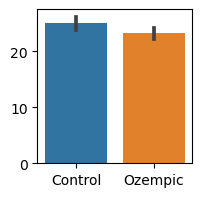

In [4]:
#Let's plot it
plt.figure(figsize=(2, 2))
ax = sns.barplot ([Control, Ozempic])
ax.set_xticklabels(["Control", "Ozempic"]); 

In [5]:
import pingouin as pg
pg.ttest(Control, Ozempic) 

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.963961,8,two-sided,0.085135,"[-0.31, 3.91]",1.242118,1.363,0.408815


#### Does this mean that Ozempic doesn't cause weight loss in mice?

##

In [6]:
# You decide to run another 2 mice
Control = [25, 26, 27, 24, 23, 24, 25]
Ozempic = [24, 25, 22, 22, 23, 24, 24] 
pg.ttest(Control, Ozempic)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.148345,12,two-sided,0.052799,"[-0.02, 2.88]",1.148339,1.724,0.506232


#### What is the practice of adding subjects until you reach significance called? 

##

C:\Users\kravitza.PSYCH\AppData\Local\anaconda3\Lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


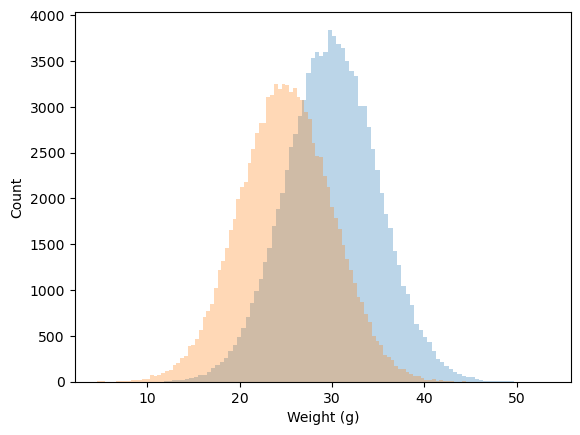

In [7]:
#Let's use simulation to determine the Statistical power of our Ozempic vs. Control experiments
ControlPop = sorted(np.random.normal(30, 5, 100000))
OzempicPop = sorted(np.random.normal(25, 5, 100000))

sns.histplot(ControlPop, alpha=0.3, bins = 100, lw = 0)
sns.histplot(OzempicPop, alpha=0.3, bins = 100, lw = 0)
plt.xlabel("Weight (g)");

In [8]:
#now let's simulate an experimental sample of N mice per group:
mice_per_group = 5
Control = random.sample(ControlPop, mice_per_group)
Ozempic = random.sample(OzempicPop, mice_per_group)

print ("Control Mean: " + str(np.mean(Control)))
print ("Ozempic Mean: " + str(np.mean(Ozempic)))
print ("Difference " + str(np.mean(Ozempic) - np.mean(Control)))

Control Mean: 30.438526816042874
Ozempic Mean: 19.885660102403328
Difference -10.552866713639546


In [9]:
pg.ttest(Control, Ozempic)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.267098,8,two-sided,0.053131,"[-0.18, 21.29]",1.433839,1.794,0.513248


In [44]:
#Let's use simulation to determine our statical power
mice_per_group = 17
TotalTests = 500

SignificantTests = []
for i in range(TotalTests):
    # Simulate data
    Control = np.random.normal(30, 5, 5)
    Ozempic = np.random.normal(25, 5, 5)
    
    # Perform a two-sample t-test
    t_test_result = pg.ttest(Control, Ozempic)
    
    # Check if the p-value is less than 0.05
    p_value = t_test_result['p-val'][0]
    is_significant = p_value < 0.05
    
    # Append the result to the list
    SignificantTests.append(is_significant) 

print ("Statistical Power is: " + str(sum(SignificantTests)/TotalTests))

Statistical Power is: 0.794


### Statistical Power: The probability of detecting a significant result in your sample when it exists in the population (i.e a true positive).


##

### What four factors impact statistical power?


- effect size
- variance 
- sample size
- which statistical test you use, including your alpha


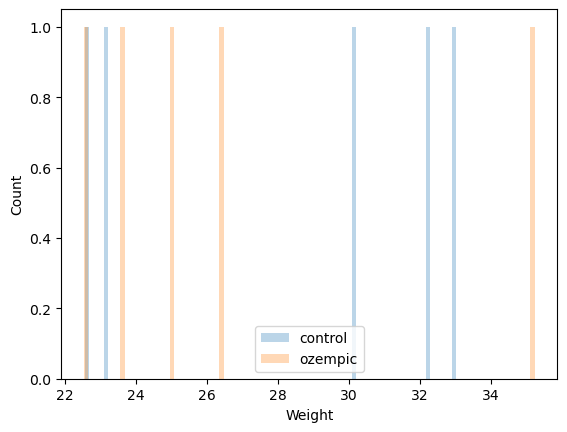

In [45]:
#How can we increase statistical power?

Control = np.random.normal(30, 5, 5)
Ozempic = np.random.normal(25, 5, 5)

sns.histplot(Control, alpha=0.3, bins = 100, lw = 0, label="control")
sns.histplot(Ozempic, alpha=0.3, bins = 100, lw = 0, label="ozempic");
plt.xlabel ("Weight")
plt.legend(title='')

In [36]:
#Let's use simulation to determine our statistical power
mice_per_group = 5
TotalTests = 100

SignificantTests = []
for i in range(TotalTests):
    # Simulate data
    Control = np.random.normal(30, 5, 5)
    Ozempic = np.random.normal(25, 5, 5)

    # Perform a two-sample t-test
    t_test_result = pg.ttest(Control, Ozempic)
    #alternative='two-sided',

    # Check if the p-value is less than 0.05
    p_value = t_test_result['p-val'][0]
    is_significant = p_value < 0.05

    # Append the result to the list
    SignificantTests.append(is_significant)

print ("Statistical Power is: " + str(sum(SignificantTests)/TotalTests))

Statistical Power is: 0.29


### What four factors impact statistical power?
- effect size
- variance 
- sample size
- which statistical test you use, including your alpha


### Goals of lecture:
- ~~Introduce one more package: Pingouin~~
- ~~Understand statistical power~~
- Learn what an "effect size" is, and how to express it
- Determine how to calculate the number of subjects you should include in your studies

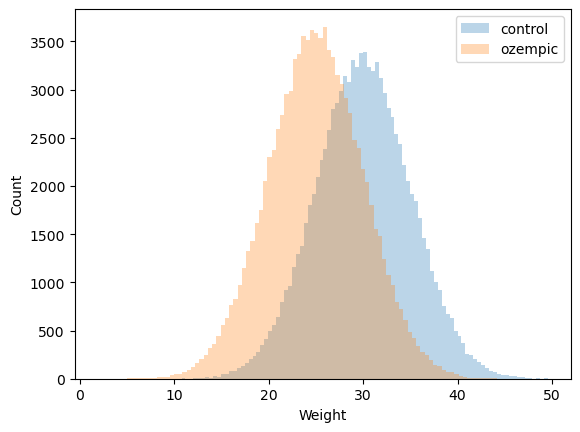

In [35]:
#Back to our Ozempic simulation - What's the Effect  Size?
ControlPop = np.random.normal(30, 5, 100000)
OzempicPop = np.random.normal(25, 5, 100000)

sns.histplot(ControlPop, alpha=0.3, bins = 100, lw = 0, label="control")
sns.histplot(OzempicPop, alpha=0.3, bins = 100, lw = 0, label="ozempic");
plt.xlabel ("Weight")
plt.legend(title='')


### How can we express effect size?
- Difference in absolute units (ie: 5 grams)
- Difference expressed as the Z-score between two means (Cohen's D)


 - ### You will convert raw unit effect sizes to Cohen's D for power analysis

## Graphical depiction of Cohen's D
[Click here for a cool demo by Kristoffer Magnusson](https://rpsychologist.com/cohend/)

In [14]:
#Here is a forumla to calculate Cohen's D (you will use this forumla in the homework too)
def CalculateCohensD (x, y):
    cohensD = (np.mean(x) - np.mean(y)) / (np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2))
    return cohensD

In [15]:
#Let's look at Cohen's D for the Control and Ozempic populations
ControlPop = np.random.normal(30, 5, 1000000)
OzempicPop = np.random.normal(25, 5, 1000000)
CalculateCohensD(ControlPop, OzempicPop)

0.9969757497583328

## There are python packages that will determine statistical power for you given:



- effect size
- variance in the data
- sample size
- which statistical test you plan to use, including your alpha


## Pinguion power!
![](https://i.pinimg.com/originals/64/77/de/6477de09007adca909c6e73e94f59b07.gif)

In [16]:
#Let's go through our Ozempic example with Pinguoin's power test
effect_size = 1  # Cohen's D
alpha = 0.05

power = pg.power_ttest(d=effect_size, n=5, alpha=0.05)
print("Power: " + str(power))

Power: 0.28629549342627786


### Goals of lecture:
- ~~Introduce one more package: Pingouin~~
- ~~Understand statistical power~~
- ~~Learn what an "effect size" is, and how to express it~~
- Determine how to calculate the number of subjects you should include in your studies

### There are multiple types of Power Analysis:
- "Power-determination analysis" - (often post-hoc) what power did a study have to detect an effect? 
- "Sample-size determination analysis" - how many subjects do I need to detect a desired effect size?
- "Effect-size sensitivity analysis" - what effect size is a study design sensitive to detect?


In [21]:
#We already ran a "power determination analysis" on our Ozempic example

effect_size = 1
n = 5
alpha = 0.05

power = round(pg.power_ttest(d=effect_size, n=n, alpha=0.05),2)
print("Power: " + str(power))

Power: 0.29


In [18]:
#Now let's do an "effect-size sensitivity analysis" on our Ozempic example

power = 0.80
n = 10
alpha = 0.05

effect_size  = round(pg.power_ttest(power=power, n=n, alpha=0.05),2)
print("Effect size we can detect with 0.80 power: " + str(effect_size))

Effect size we can detect with 0.80 power: 1.32


In [19]:
#And now let's do a "sample-size determination analysis" on our Ozempic example

power = 0.80
alpha = 0.05
effect_size = 1

sample_size  = round(pg.power_ttest(power=power, d=effect_size, alpha=0.05),2)
print("Number of animals needed per group to detect a Cohen's D of 1, with 0.80 power: " + str(sample_size))

Number of animals needed per group to detect a Cohen's D of 1, with 0.80 power: 16.71


### Let's go back to the beginning: We decide to test if Ozempic causes weight loss in mice.  

What do we need to know before we chooose a sample size?


### Step 1: Determine a meaningful effect size for your question. 
Let's assume we want to detect at least a 10% change in body weight (convert this effect size to a Cohen's D)


### Step 2: Determine the appropriate statitical test
Choose your statistical test. Here we'll use a t-test.



### Step 3: Determine your desired statistical power and alpha
Power will almost always be 0.8, and alpha will almost always be 0.05



### Step 4: Estimate the means and standard deviation of your data 
This can be tricky, and requires pilot data or good literature on the topic, but is required to convert your effect size to Cohen's D

In [20]:
effect_size = 0.1
meanweight = 30
std = 5

cohensd = effect_size * meanweight / std  # Looking for a 10% effect in 30g mice, divided by the Stdev
alpha = 0.05
power = 0.8

samplesize = round(pg.power_ttest(power = power, d=cohensd, alpha=alpha),2)
print("Sample Size: " + str(samplesize))

Sample Size: 44.59


Practical recommendations
- Power analyses are not useful with small n's  
- Proceed cautiously if your power determination shows you detected an effect with power < 0.8
- Run a pilot, and then plan out your publishable study